In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 19102         
np.random.seed(NPM)

makan =  pd.read_csv("makanan.csv")
makan

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,8000.0


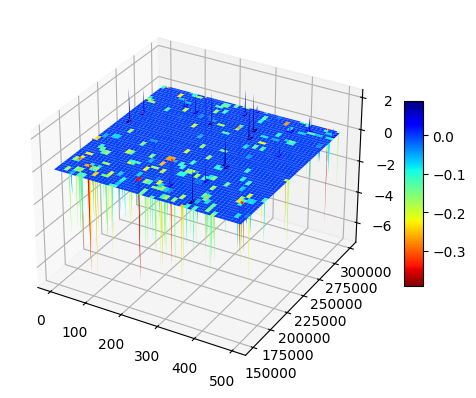

In [5]:
# asumsi
budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 61), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0
    
    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")    
        resp_pilih[n][2*1]= pilihan
        
        # makan keduas
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")    
        resp_pilih[n][2*1+1]= pilihan
    
    # print(f"skor: {skor_kumulatif}, sisa uang: {budget}")    
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    # print(f"{n} skor sehat:{skor_sehat}")
    
    resp_sehat[n][ int((budget-SISA_MININUM)/1000)]= skor_sehat

# np.corrcoef(skor, sisa)
# np.histogram(sisa)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
# Colorize the surface using a colormap
surf = ax.plot_surface(X, Y, resp_sehat, 
                       cmap='jet_r',   # try 'plasma', 'coolwarm', etc.
                       edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# plot yang ini barangkali butuh dipercantik

# TUGAS
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif 
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)


In [6]:
mask_sehat = sehat > 0
pola_sehat = np.where(mask_sehat)[0]
print("Indeks skenario sehat:", pola_sehat)

Indeks skenario sehat: [  0  13  27  31  38  58  76  81  83  84  97 101 143 145 148 170 207 222
 227 254 255 261 272 273 311 319 321 334 340 344 347 357 371 376 381 390
 425 430 433 437 448 482 491]


Daftar Indeks skenario sehat menunjukkan nomor-nomor simulasi yang secara kumulatif menghasilkan nilai kesehatan lebih tinggi dari ambang nol, artinya pola makan pada skenario-skenario itu lebih “sehat” dibanding rata-rata.

In [29]:
mask_uang = sisa > 0
pola_sehat_uang = np.where(mask_sehat & mask_uang)[0]
print("Indeks skenario sehat + ada sisa uang:", pola_sehat_uang)

Indeks skenario sehat + ada sisa uang: [  0  13  27  31  38  58  76  81  83  84  97 101 143 145 148 170 207 222
 227 254 255 261 272 273 311 319 321 334 340 344 347 357 371 376 381 390
 425 430 433 437 448 482 491]


Daftar skenario sehat + ada sisa uang adalah subset dari skenario sehat yang juga tersisa uangnya setelah sebulan, jadi mereka memenuhi dua syarat sekaligus: sehat dan tidak kehabisan.

In [30]:
idx_best = np.argmax(skor * mask_sehat)   # skor terbesar dengan sehat positif
print("Skenario terbaik:", idx_best)
print("Skor:", skor[idx_best], 
      "Sisa:", sisa[idx_best], 
      "Sehat:", sehat[idx_best])


Skenario terbaik: 433
Skor: 99.89037593440814 Sisa: 115000.0 Sehat: 1.4000000000000004


Skenario terbaik adalah skenario sehat yang punya nilai skor kumulatif tertinggi menurut bobot yang digunakan. Nilai ini merepresentasikan kombinasi kenyang, rasa, sehat, dan bosan yang paling “menguntungkan”

In [35]:
budget_awal = 1e6   # rupiah (1 juta)
NUM_HARI = 31
SAMPLE_NUM = 500
# === PARAMETER SIMULASI ===
NPM = 19102
np.random.seed(NPM)

budget_awal = 1e6   # budget awal 1 juta rupiah
NUM_HARI = 31       # jumlah hari simulasi
SAMPLE_NUM = 500    # jumlah skenario

wkenyang_base = 0.8
wrasa_base    = 0.7
wsehat_base   = 0.9
wbosan_base   = 0.2

skor  = np.zeros(SAMPLE_NUM, dtype=float)
sisa  = np.zeros(SAMPLE_NUM, dtype=float)
sehat = np.zeros(SAMPLE_NUM, dtype=float)
resp_pilih = np.zeros((SAMPLE_NUM, NUM_HARI*2), dtype=int)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=float)


In [55]:
for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0
    
    for i in range(NUM_HARI):
        # ===== Makan pertama =====
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa   = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat  = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan  = np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan] +
            w_rasa   * makan['rasa'][pilihan] +
            w_sehat  * makan['sehat'][pilihan] -
            w_bosan  * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan  # simpan pilihan pagi

        # ===== Makan kedua =====
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa   = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat  = np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan  = np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan] +
            w_rasa   * makan['rasa'][pilihan] +
            w_sehat  * makan['sehat'][pilihan] -
            w_bosan  * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan  # simpan pilihan malam
    
    # simpan hasil per skenario
    sisa[n]  = budget
    skor[n]  = skor_kumulatif
    sehat[n] = skor_sehat

    # isi matriks respons sehat sesuai bin sisa
    idx_bin = int((budget - SISA_MININUM)/1000)
    if 0 <= idx_bin < len(bin_sisa):
        resp_sehat[n][idx_bin] = skor_sehat

# === ANALISIS ===
# (1) pola sehat positif
mask_sehat = sehat > 0
# (2) sehat + sisa uang positif
mask_uang  = sisa > 0
mask_final = mask_sehat & mask_uang
idx_kandidat = np.where(mask_final)[0]

print("Jumlah skenario sehat + ada sisa uang:", len(idx_kandidat))

# (3) cari skor kumulatif terbesar dengan sehat positif
idx_best = np.argmax(skor * mask_sehat)
print("Skenario terbaik:", idx_best)
print("  Skor:", skor[idx_best])
print("  Sehat:", sehat[idx_best])
print("  Sisa uang:", sisa[idx_best])

Jumlah skenario sehat + ada sisa uang: 32
Skenario terbaik: 68
  Skor: 96.86340824284018
  Sehat: 0.4999999999999999
  Sisa uang: 114000.0


In [56]:
# (4) tampilkan jadwal makan skenario terbaik
jadwal = []  # list kosong

for hari in range(NUM_HARI):
    pagi  = makan['makanan'][resp_pilih[idx_best][2*hari]]
    malam = makan['makanan'][resp_pilih[idx_best][2*hari+1]]
    
    jadwal.append({
        "Hari": hari+1,   # mulai dari 1
        "Pagi": pagi,
        "Malam": malam
    })

# ubah ke DataFrame dengan index mulai dari 1
jadwal = pd.DataFrame(jadwal)
jadwal.index = np.arange(1, len(jadwal)+1)
jadwal


,Hari,Pagi,Malam
1,1,mochi,ayamkatsu
2,2,nasi telur,ayamgeprek
3,3,nasipadang,nasipadang
4,4,mieayam,dimsum
5,5,mieayam,nasipadang
6,6,mieayam,nasipadang
7,7,ayamkatsu,nasi telur
8,8,ayamgeprek,ayamgeprek
9,9,ayamgeprek,ayamkatsu
10,10,warteg,nasipadang


Tabel tersebut menunjukkan jadwal makan harian untuk satu skenario terbaik, dengan setiap baris merepresentasikan satu hari (index dan kolom “Hari” mulai dari 1 sampai 31).
Untuk tiap hari tersaji dua kolom: Pagi (menu sarapan) dan Malam (menu makan malam), jadi misalnya pada hari 1 pagi dimakan mochi dan malamnya ayamkatsu.
Pada hari 2 terlihat kombinasi berbeda: pagi nasi telur dan malam ayamgeprek, sedangkan pada hari 3 menu pagi dan malam sama-sama nasipadang.
Adanya baris dengan menu yang sama pada pagi dan malam menandakan bahwa pemilihan menu bersifat acak dan pengulangan dalam satu hari memang mungkin terjadi.


Jumlah titik nonzero: 499 (harusnya ~SAMPLE_NUM)


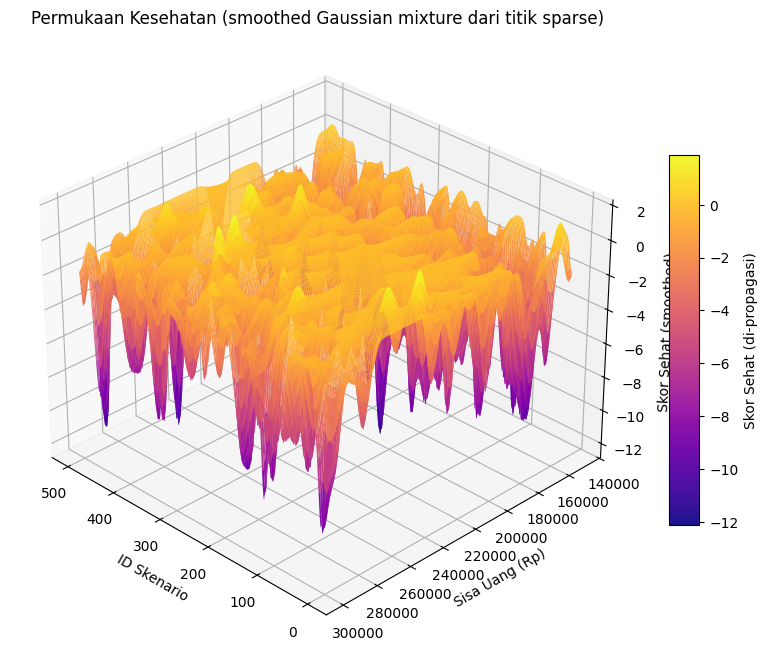

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sampleid = np.arange(SAMPLE_NUM)

inds = np.argwhere(resp_sehat != 0.0)  
values = resp_sehat[resp_sehat != 0.0]  

print(f"Jumlah titik nonzero: {len(values)} (harusnya ~SAMPLE_NUM)")

S = SAMPLE_NUM
B = len(bin_sisa)
X_idx, Y_idx = np.meshgrid(np.arange(S), np.arange(B), indexing='ij')

sigma_x = 5.0   
sigma_y = 3.0   

Z = np.zeros((S, B), dtype=float)

for (s_idx, b_idx), val in zip(inds, values):
    dx2 = (X_idx - s_idx)**2
    dy2 = (Y_idx - b_idx)**2
    bump = val * np.exp(-0.5 * (dx2 / (sigma_x**2) + dy2 / (sigma_y**2)))
    Z += bump

X_plot, Y_plot = np.meshgrid(sampleid, bin_sisa, indexing='ij') 

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    X_plot, Y_plot, Z,
    cmap='plasma',
    linewidth=0,
    antialiased=True,
    rcount=200, ccount=200,
    alpha=0.95
)

cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12)
cbar.set_label("Skor Sehat (di-propagasi)")

ax.set_title("Permukaan Kesehatan (smoothed Gaussian mixture dari titik sparse)")
ax.set_xlabel("ID Skenario")
ax.set_ylabel("Sisa Uang (Rp)")
ax.set_zlabel("Skor Sehat (smoothed)")

ax.view_init(elev=30, azim=135)
plt.show()

Skor kesehatan kumulatif negatif (warna ungu), artinya pola makan acak selama sebulan cenderung kurang sehat, hanya 32 dari 500 skenario yang memenuhi syarat sehat >0 sekaligus masih memiliki sisa uang, sehingga kombinasi sehat sekaligus hemat itu relatif jarang. Skenario terbaik adalah skenario 68 (Skor ≈ 96.9, Sehat ≈ 0.5, Sisa ≈ 114.000) yang berarti skenario ini memberi skor kepuasan atau kenyang tinggi dan sedikit positif untuk kesehatan namun menyisakan uang yang relatif itu kecil. 